# Creación de un ejemplo adversarial

In [4]:

import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten ,Input
from keras.layers import Conv2D, MaxPooling2D, Reshape, Add
from keras.metrics import categorical_accuracy
from keras.regularizers import l1_l2, l2, l1
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Activation
from keras.utils.generic_utils import get_custom_objects
from tensorflow.python.keras import backend as K
from keras.preprocessing.image import array_to_img,img_to_array

import matplotlib.pyplot as plt
import numpy as np

#load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#preprocess data
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.
x_test /= 255.

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

#compile CNN network for MNIST classification 
inputs = Input(shape=(28,28,1))
net = Conv2D(32, kernel_size=(3, 3),
                 activation='relu')(inputs)
net = Conv2D(64, kernel_size=(3, 3),
                 activation='relu')(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Dropout(0.25)(net)
net = Flatten()(net)
net = Dense(128, activation='relu')(net)
net = Dropout(0.5)(net)
outputs = Dense(10, activation='softmax')(net)

mnist_model = Model(inputs=inputs, outputs=outputs, name='classification_model')
mnist_model.compile(optimizer='nadam', loss='categorical_crossentropy',metrics=[categorical_accuracy])

#train MNIST classifer
earlyStop = EarlyStopping(monitor='val_categorical_accuracy', min_delta=0, patience=10, verbose=0, mode='auto',
                          baseline=None, restore_best_weights=True)

#mnist_model.fit(x_train, y_train, batch_size=128, epochs=100, verbose=0, validation_data=(x_test, y_test),
#               callbacks=[earlyStop])
mnist_model.fit(x_train, y_train, batch_size=128, epochs=3, verbose=2, validation_data=(x_test, y_test))

print(mnist_model.evaluate(x_train, y_train))
print(mnist_model.evaluate(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
 - 40s - loss: 0.1986 - categorical_accuracy: 0.9388 - val_loss: 0.0495 - val_categorical_accuracy: 0.9835
Epoch 2/3
 - 39s - loss: 0.0756 - categorical_accuracy: 0.9772 - val_loss: 0.0372 - val_categorical_accuracy: 0.9873
Epoch 3/3
 - 51s - loss: 0.0561 - categorical_accuracy: 0.9830 - val_loss: 0.0332 - val_categorical_accuracy: 0.9891
60000/60000 [==============================] - 18s 306us/step
[0.01913473764181981, 0.9941499829292297]
10000/10000 [==============================] - 3s 273us/step
[0.03318603273532863, 0.9890999794006348]


Eligamos una imagen para crear ejemplo adversarial

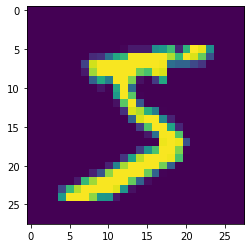

In [5]:
#select image to create an adversarial example from
img = x_train[0:1]
plt.imshow(img.reshape((28,28)),vmin=0., vmax=1.)
plt.show()

Veamos qué clasificacion da el modelo

In [6]:
#varify accurate classificaiton
prediction = mnist_model.predict(img)[0]
print(prediction)


[1.7737483e-11 6.2608922e-09 8.9847067e-11 3.6302149e-02 5.0390000e-12
 9.6368796e-01 3.2505997e-07 7.6546360e-09 1.2309062e-06 8.2603947e-06]


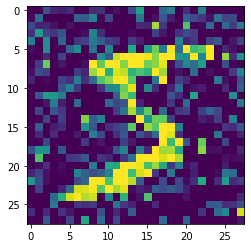

[2.1083179e-06 8.7270295e-05 2.7041782e-05 3.9616412e-01 1.4128898e-06
 5.9841907e-01 4.0781495e-04 2.2897200e-04 2.1130473e-03 2.5491668e-03]


In [7]:
#applying random noise does not fool the classifier
quantized_noise = np.round(np.random.normal(loc=0.0, scale=0.3, size=img.shape) * 255.) / 255.
noisy_img = np.clip(img + quantized_noise, 0., 1.)
plt.imshow(noisy_img.reshape((28,28)),vmin=0., vmax=1.)
plt.show()
noisy_prediction = mnist_model.predict(noisy_img)[0]
print(noisy_prediction)

Epoch 1/100
1/1 [==============================] - 0s 159ms/step - loss: 0.3019 - categorical_accuracy: 1.0000
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2802 - categorical_accuracy: 1.0000
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 0.2758 - categorical_accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2505 - categorical_accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 0.2477 - categorical_accuracy: 1.0000
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 0.2362 - categorical_accuracy: 1.0000
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2360 - categorical_accuracy: 1.0000
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2128 - categorical_accuracy: 1.0000
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0897 - categorical_accuracy: 1.0000
Epoch 10/100
1/1 

Epoch 74/100
1/1 [==============================] - 0s 3ms/step - loss: -6.7251 - categorical_accuracy: 0.0000e+00
Epoch 75/100
1/1 [==============================] - 0s 3ms/step - loss: -14.9351 - categorical_accuracy: 0.0000e+00
Epoch 76/100
1/1 [==============================] - 0s 3ms/step - loss: -11.2263 - categorical_accuracy: 0.0000e+00
Epoch 77/100
1/1 [==============================] - 0s 3ms/step - loss: -6.5990 - categorical_accuracy: 0.0000e+00
Epoch 78/100
1/1 [==============================] - 0s 3ms/step - loss: -8.0248 - categorical_accuracy: 0.0000e+00
Epoch 79/100
1/1 [==============================] - 0s 4ms/step - loss: -13.2868 - categorical_accuracy: 0.0000e+00
Epoch 80/100
1/1 [==============================] - 0s 3ms/step - loss: -7.7354 - categorical_accuracy: 0.0000e+00
Epoch 81/100
1/1 [==============================] - 0s 3ms/step - loss: -7.3497 - categorical_accuracy: 0.0000e+00
Epoch 82/100
1/1 [==============================] - 0s 4ms/step - loss: -12.0

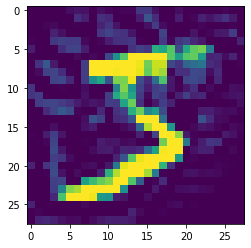

[[3.4567330e-14 6.2371691e-10 8.8607767e-11 9.9999750e-01 1.6921743e-14
  2.4518833e-06 2.1871858e-10 8.7814902e-09 8.8053396e-09 1.9766939e-09]]
Epoch 1/100
1/1 [==============================] - 0s 154ms/step - loss: -0.3259 - categorical_accuracy: 1.0000
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: -1.0436 - categorical_accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: -0.0563 - categorical_accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 0.0152 - categorical_accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: -0.4842 - categorical_accuracy: 1.0000
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 8.3202e-04 - categorical_accuracy: 1.0000
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: -0.0098 - categorical_accuracy: 1.0000
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: -3.93

Epoch 72/100
1/1 [==============================] - 0s 3ms/step - loss: -6.0486 - categorical_accuracy: 0.0000e+00
Epoch 73/100
1/1 [==============================] - 0s 3ms/step - loss: -8.3190 - categorical_accuracy: 0.0000e+00
Epoch 74/100
1/1 [==============================] - 0s 3ms/step - loss: -10.2477 - categorical_accuracy: 0.0000e+00
Epoch 75/100
1/1 [==============================] - 0s 3ms/step - loss: -8.1688 - categorical_accuracy: 0.0000e+00
Epoch 76/100
1/1 [==============================] - 0s 3ms/step - loss: -9.7220 - categorical_accuracy: 0.0000e+00
Epoch 77/100
1/1 [==============================] - 0s 3ms/step - loss: -6.2478 - categorical_accuracy: 0.0000e+00
Epoch 78/100
1/1 [==============================] - 0s 3ms/step - loss: -12.7063 - categorical_accuracy: 0.0000e+00
Epoch 79/100
1/1 [==============================] - 0s 3ms/step - loss: -5.4547 - categorical_accuracy: 0.0000e+00
Epoch 80/100
1/1 [==============================] - 0s 3ms/step - loss: -6.472

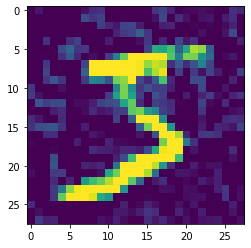

[[4.7322476e-13 2.3517477e-09 3.4165146e-10 9.9998832e-01 2.4171661e-13
  1.1679251e-05 7.8956147e-10 3.3484245e-08 2.9128259e-08 1.8089253e-08]]
Epoch 1/100
1/1 [==============================] - 0s 180ms/step - loss: 0.3299 - categorical_accuracy: 1.0000
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: -0.2235 - categorical_accuracy: 1.0000
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 0.3066 - categorical_accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 0.2286 - categorical_accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 0.2747 - categorical_accuracy: 1.0000
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 0.2817 - categorical_accuracy: 1.0000
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: -0.8019 - categorical_accuracy: 0.0000e+00
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 0.2348 - cat

Epoch 73/100
1/1 [==============================] - 0s 3ms/step - loss: -18.8237 - categorical_accuracy: 0.0000e+00
Epoch 74/100
1/1 [==============================] - 0s 6ms/step - loss: -8.6333 - categorical_accuracy: 0.0000e+00
Epoch 75/100
1/1 [==============================] - 0s 4ms/step - loss: -7.4301 - categorical_accuracy: 0.0000e+00
Epoch 76/100
1/1 [==============================] - 0s 3ms/step - loss: -9.0856 - categorical_accuracy: 0.0000e+00
Epoch 77/100
1/1 [==============================] - 0s 4ms/step - loss: -7.3489 - categorical_accuracy: 0.0000e+00
Epoch 78/100
1/1 [==============================] - 0s 3ms/step - loss: -8.2342 - categorical_accuracy: 0.0000e+00
Epoch 79/100
1/1 [==============================] - 0s 3ms/step - loss: -13.8895 - categorical_accuracy: 0.0000e+00
Epoch 80/100
1/1 [==============================] - 0s 3ms/step - loss: -11.5761 - categorical_accuracy: 0.0000e+00
Epoch 81/100
1/1 [==============================] - 0s 3ms/step - loss: -5.79

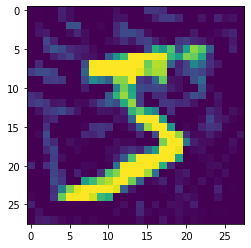

[[3.2315323e-14 4.3802101e-10 4.8773683e-11 9.9999762e-01 1.4990176e-14
  2.4199744e-06 1.2743516e-10 7.0916517e-09 7.8783922e-09 2.5410900e-09]]
Epoch 1/100
1/1 [==============================] - 0s 151ms/step - loss: 18.0720 - categorical_accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 14.7536 - categorical_accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 15.8460 - categorical_accuracy: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 7.5995 - categorical_accuracy: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 5.3842 - categorical_accuracy: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 11.4123 - categorical_accuracy: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 10.7585 - categorical_accuracy: 0.0000e+00
Epoch 8/100
1/1 [==============================] - 0s 3m

Epoch 72/100
1/1 [==============================] - 0s 3ms/step - loss: 1.6854 - categorical_accuracy: 1.0000
Epoch 73/100
1/1 [==============================] - 0s 3ms/step - loss: 3.1563 - categorical_accuracy: 0.0000e+00
Epoch 74/100
1/1 [==============================] - 0s 3ms/step - loss: 4.9182 - categorical_accuracy: 0.0000e+00
Epoch 75/100
1/1 [==============================] - 0s 4ms/step - loss: 3.7479 - categorical_accuracy: 0.0000e+00
Epoch 76/100
1/1 [==============================] - 0s 3ms/step - loss: 1.1528 - categorical_accuracy: 0.0000e+00
Epoch 77/100
1/1 [==============================] - 0s 4ms/step - loss: 6.7888 - categorical_accuracy: 0.0000e+00
Epoch 78/100
1/1 [==============================] - 0s 4ms/step - loss: 4.2007 - categorical_accuracy: 0.0000e+00
Epoch 79/100
1/1 [==============================] - 0s 3ms/step - loss: 1.4794 - categorical_accuracy: 0.0000e+00
Epoch 80/100
1/1 [==============================] - 0s 3ms/step - loss: 0.7846 - categorical

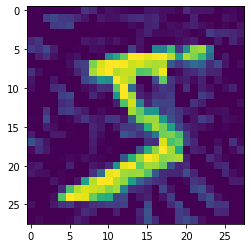

[[8.1715427e-07 1.3425053e-04 9.9055233e-06 1.3046172e-01 3.2384567e-05
  5.4998666e-01 6.1307501e-06 3.2262664e-04 7.2464081e-03 3.1179911e-01]]
Epoch 1/100
1/1 [==============================] - 0s 151ms/step - loss: 15.1575 - categorical_accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 2.3880 - categorical_accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 6.2203 - categorical_accuracy: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 11.8740 - categorical_accuracy: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 12.1287 - categorical_accuracy: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 9.0010 - categorical_accuracy: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 11.7594 - categorical_accuracy: 0.0000e+00
Epoch 8/100
1/1 [==============================] - 0s 3ms

Epoch 72/100
1/1 [==============================] - 0s 6ms/step - loss: 3.3112 - categorical_accuracy: 0.0000e+00
Epoch 73/100
1/1 [==============================] - 0s 3ms/step - loss: 4.1908 - categorical_accuracy: 0.0000e+00
Epoch 74/100
1/1 [==============================] - 0s 4ms/step - loss: 4.6160 - categorical_accuracy: 0.0000e+00
Epoch 75/100
1/1 [==============================] - 0s 3ms/step - loss: 1.2499 - categorical_accuracy: 0.0000e+00
Epoch 76/100
1/1 [==============================] - 0s 7ms/step - loss: 1.8420 - categorical_accuracy: 0.0000e+00
Epoch 77/100
1/1 [==============================] - 0s 3ms/step - loss: 2.2337 - categorical_accuracy: 0.0000e+00
Epoch 78/100
1/1 [==============================] - 0s 3ms/step - loss: 0.8918 - categorical_accuracy: 0.0000e+00
Epoch 79/100
1/1 [==============================] - 0s 3ms/step - loss: 6.9770 - categorical_accuracy: 0.0000e+00
Epoch 80/100
1/1 [==============================] - 0s 3ms/step - loss: 0.9168 - categor

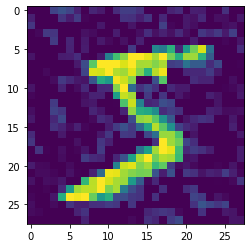

[[4.1028986e-07 7.4630429e-05 3.3347185e-06 1.6030940e-01 7.5352204e-06
  7.1527314e-01 1.0482001e-05 1.9166927e-04 3.8198261e-03 1.2030959e-01]]
Epoch 1/100
1/1 [==============================] - 0s 146ms/step - loss: 14.7571 - categorical_accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 11.1717 - categorical_accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 10.0383 - categorical_accuracy: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 18.2936 - categorical_accuracy: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 10.5381 - categorical_accuracy: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 7.3044 - categorical_accuracy: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 16.2664 - categorical_accuracy: 0.0000e+00
Epoch 8/100
1/1 [==============================] - 0s 3

Epoch 72/100
1/1 [==============================] - 0s 4ms/step - loss: 2.8562 - categorical_accuracy: 0.0000e+00
Epoch 73/100
1/1 [==============================] - 0s 4ms/step - loss: 4.4065 - categorical_accuracy: 0.0000e+00
Epoch 74/100
1/1 [==============================] - 0s 3ms/step - loss: 1.3673 - categorical_accuracy: 1.0000
Epoch 75/100
1/1 [==============================] - 0s 3ms/step - loss: 2.2798 - categorical_accuracy: 0.0000e+00
Epoch 76/100
1/1 [==============================] - 0s 4ms/step - loss: 1.0510 - categorical_accuracy: 1.0000
Epoch 77/100
1/1 [==============================] - 0s 4ms/step - loss: 1.0159 - categorical_accuracy: 1.0000
Epoch 78/100
1/1 [==============================] - 0s 4ms/step - loss: 2.6274 - categorical_accuracy: 0.0000e+00
Epoch 79/100
1/1 [==============================] - 0s 4ms/step - loss: 1.1724 - categorical_accuracy: 0.0000e+00
Epoch 80/100
1/1 [==============================] - 0s 3ms/step - loss: 3.9423 - categorical_accurac

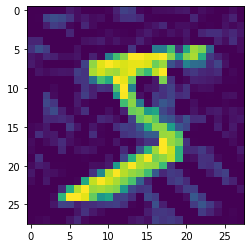

[[1.6529441e-06 1.5357052e-04 3.7365215e-05 7.7893913e-02 6.0194052e-05
  2.3381598e-01 4.6613627e-06 8.2158262e-04 8.5825864e-03 6.7862844e-01]]


array([[0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.06666667, 0.03529412, 0.        , 0.        , 0.        ,
        0.01176471, 0.09019608, 0.19215687, 0.16470589, 0.01568628,
        0.        , 0.02745098, 0.03137255, 0.03529412, 0.05490196,
        0.0627451 , 0.00392157, 0.03529412, 0.01568628, 0.        ,
        0.        , 0.03137255, 0.        ],
       [0.        , 0.00392157, 0.2       , 0.23921569, 0.21568628,
        0.15294118, 0.03529412, 0.06666667, 0.02745098, 0.03921569,
        0.        , 0.06666667, 0.14117648, 0.14509805, 0.11372549,
        0.00784314, 0.00392157, 0.        , 0.        , 0.        ,
        0.        , 0.10196079, 0.01568628, 0.        , 0.        ,
        0.03529412, 0.09019608, 0.00392157],
       [0.        , 0.        , 0.07843138, 0.18039216, 0.14901961,
        0.01960784, 0.        , 0.10588235, 0.02745098, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.03137255, 0.0588

In [12]:

#custom activation function for keeping adversarial pixel values between 0.0 and 1.0
def clip(x):
    return K.clip(x, 0.0, 1.0)

#custom loss funciton for non-targeted misclassification
def negative_categorical_crossentropy(yTrue,yPred):
    return 0.0 - K.categorical_crossentropy(yTrue,yPred)

#add custom objects to dictionary
get_custom_objects().update({'clip': Activation(clip)})
get_custom_objects().update({'negative_categorical_crossentropy': negative_categorical_crossentropy})


#function for generating an adversarial example given a base image, adversarial class target, classifier, and regularization type
def generate_adversary(img,target,model,regularization,loss_function):
    
    #input for base image
    image = Input(shape=(28,28,1),name='image')
    #unit input for adversarial noise
    one = Input(shape=(1,),name='unity')
    
    #layer for learning adversarial noise to apply to image
    noise = Dense(28*28,activation = None,use_bias=False,kernel_initializer='random_normal',
                  kernel_regularizer=regularization, name='adversarial_noise')(one)
    
    #reshape noise in shape of image
    noise = Reshape((28,28,1),name='reshape')(noise)
    
    #add noise to image
    net = Add(name='add')([noise,image])
    #clip values to be within 0.0 and 1.0
    net = Activation('clip',name='clip_values')(net)
    
    #feed adversarial image to trained MNIST classifier
    outputs = model(net)

    adversarial_model = Model(inputs=[image,one], outputs=outputs)
    #freeze trained MNIST classifier layers
    adversarial_model.layers[-1].trainable = False
    
    adversarial_model.compile(optimizer='nadam', loss=loss_function, metrics=[categorical_accuracy])
        
    #target adversarial classification
    target_vector = np.zeros(10)
    target_vector[target] = 1.
    
    #callback for saving weights with smallest loss
    checkpoint = ModelCheckpoint('./adversarial_weights.h5', monitor='loss', verbose=0, save_best_only=True, save_weights_only=True,
                                 mode='auto', period=1)
    #train adversarial image
    adversarial_model.fit(x={'image':img,'unity':np.ones(shape=(1,1))},y=target_vector.reshape(1,-1),epochs=100,verbose=1,
                         callbacks=[checkpoint])
    #restore best weights
    adversarial_model.load_weights('./adversarial_weights.h5')
    
    #quantize adversarial noise
    quantized_weights = np.round(adversarial_model.get_weights()[0].reshape((28,28)) * 255.) / 255.
    
    #add trained weights to original image and clip values to produce adversarial image
    adversarial_img = np.clip(img.reshape((28,28)) + quantized_weights, 0., 1.)
    
    #display adversarial image
    plt.imshow(adversarial_img,vmin=0., vmax=1.)
    plt.show()
    #classify adversarial image
    adversarial_prediction = mnist_model.predict(adversarial_img.reshape((1,28,28,1)))
    print(adversarial_prediction)
    
    return adversarial_img

generate_adversary(img,5,mnist_model,l1(0.01),'negative_categorical_crossentropy')
generate_adversary(img,5,mnist_model,l2(0.01),'negative_categorical_crossentropy')
generate_adversary(img,5,mnist_model,l1_l2(l1=0.01,l2=0.01),'negative_categorical_crossentropy')

generate_adversary(img,9,mnist_model,l1(0.01),'categorical_crossentropy')
generate_adversary(img,9,mnist_model,l2(0.01),'categorical_crossentropy')
generate_adversary(img,9,mnist_model,l1_l2(l1=0.01,l2=0.01),'categorical_crossentropy')
